In [51]:
import pandas as pd
import json
from io import StringIO

In [65]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [42]:
mca_file = '../data/MCA_Figure2_Cell.csv'

In [43]:
# pd.concat([df.query('col1 == 1') for df in pd.read_csv(StringIO(txt), chunksize=1)])

In [44]:
metadata = pd.read_csv(mca_file, sep='\t')

In [45]:
metadata.head()

,Cell_ID,ClusterID,Tissue,Cell type
0,Uterus_1.CTGTGTAAGTACAGGGTC,34,Uterus,Stromal cell
1,Uterus_2.GTAATGCCAGACCCGACG,17,Uterus,Endothelial cell
2,Uterus_1.AGGGTCAAGCGGAACGCC,34,Uterus,Stromal cell
3,Uterus_1.ATTCCACGAGTAATACAG,34,Uterus,Stromal cell
4,Uterus_1.ACACCCTTTAGGTAGCAT,81,Uterus,Principal cells of cortical collecting duct


In [46]:
metadata['Tissue'].unique()

array(['Uterus', 'TrophoblastStemCells', 'Thymus', 'Testis', 'Stomach',
       'Spleen', 'SmallIntestine', 'Prostate', 'Placenta',
       'PeripheralBlood', 'Pancreas', 'Ovary', 'NeontalBrain',
       'NeonatalSkin', 'NeonatalRib', 'NeonatalMuscle', 'NeonatalHeart',
       'NeonatalCalvaria', 'Muscle', 'Mouse3T3',
       'MesenchymalStemCellsPrimary', 'MesenchymalStemCells',
       'MammaryGland.Virgin', 'MammaryGland.Pregnancy',
       'MammaryGland.Lactation', 'MammaryGland.Involution',
       'Male.fetal.Gonad', 'Lung', 'Liver', 'Kidney', 'FetalStomach',
       'FetalLung', 'FetalLiver', 'FetalKidney', 'FetalIntestine',
       'FetalBrain', 'Female.fetal.Gonad', 'EmbryonicStemCells',
       'EmbryonicMesenchyme', 'Brain', 'BoneMarrowcKit', 'BoneMarrow',
       'Bladder'], dtype=object)

In [47]:
from ols import OlsClient
ols = OlsClient()

In [48]:
tissue_uberon = {}
for tissue in metadata['Tissue'].unique():
    tissue_uberon[tissue] = ols.advanced_search(tissue, ontology='uberon', first_iri=True, verbose=False)

    

In [49]:
tissue_uberon

{'Uterus': 'http://purl.obolibrary.org/obo/UBERON_0000995',
 'TrophoblastStemCells': '',
 'Thymus': 'http://purl.obolibrary.org/obo/UBERON_0002370',
 'Testis': 'http://purl.obolibrary.org/obo/UBERON_0000473',
 'Stomach': 'http://purl.obolibrary.org/obo/UBERON_0000945',
 'Spleen': 'http://purl.obolibrary.org/obo/UBERON_0002106',
 'SmallIntestine': '',
 'Prostate': 'http://purl.obolibrary.org/obo/UBERON_0002367',
 'Placenta': 'http://purl.obolibrary.org/obo/UBERON_0001987',
 'PeripheralBlood': '',
 'Pancreas': 'http://purl.obolibrary.org/obo/UBERON_0001264',
 'Ovary': 'http://purl.obolibrary.org/obo/UBERON_0000992',
 'NeontalBrain': '',
 'NeonatalSkin': '',
 'NeonatalRib': '',
 'NeonatalMuscle': '',
 'NeonatalHeart': '',
 'NeonatalCalvaria': '',
 'Muscle': 'http://purl.obolibrary.org/obo/UBERON_0005090',
 'Mouse3T3': '',
 'MesenchymalStemCellsPrimary': '',
 'MesenchymalStemCells': '',
 'MammaryGland.Virgin': '',
 'MammaryGland.Pregnancy': '',
 'MammaryGland.Lactation': '',
 'MammaryGland

In [55]:
with open('../data/tissue_uberon.json','w') as f:
    json.dump(tissue_uberon,f)

In [57]:
with open('../data/tissue_uberon.json','r') as f:
    tissue_uberon = json.load(f)

In [58]:
metadata['Cell type'].unique()

array(['Stromal cell', 'Endothelial cell',
       'Principal cells of cortical collecting duct', 'Dendritic cell',
       'Macrophage', 'Osteoblast', 'NK cell', 'Smooth muscle cell',
       'Neutrophil', 'B cell', 'Muscle cell', 'Myocyte', 'Monocyte',
       'T cell', 'Mast cell', 'Trophoblast stem cell', 'MSC (Cultured)',
       'MEF (Cultured)', 'Trophoblast progenitor cell',
       'Myeloid progenitor cell', 'Testicular cell', 'Leydig cell',
       'Primordial germ cell', 'Gastric mucosa cell',
       'Stomach epithelial cell', 'Endocrine cell', 'Epithelial cell',
       'Neuron', 'Erythroid progenitor', 'Erythroblast', 'NK/T cell',
       'Intestinal epithelial cell', 'Prostate gland cell', 'Urothelium',
       'Placenta endodermal cell ', 'Decidual stromal cell',
       'Spongiotrophoblast', 'Hepatocyte', 'Proliferating Myocyte',
       'Microglia', 'Cycling cell', 'Myoblast', 'Pancreatic acinar cell',
       'Luteal cell', 'Cumulus cell', 'Granulosa cell', 'Schwann cell',
       

In [19]:
cell_ontology = {}
for cell_type in metadata['Cell type'].unique():
    cell_ontology[cell_type] = ols.advanced_search(cell_type, ontology='cl', first_iri=True, verbose=False)


In [59]:
cell_ontology

{'Stromal cell': 'http://purl.obolibrary.org/obo/CL_0000499',
 'Endothelial cell': 'http://purl.obolibrary.org/obo/CL_0000115',
 'Principal cells of cortical collecting duct': 'http://purl.obolibrary.org/obo/CL_1000714',
 'Dendritic cell': 'http://purl.obolibrary.org/obo/CL_0000451',
 'Macrophage': 'http://purl.obolibrary.org/obo/CL_0000235',
 'Osteoblast': 'http://purl.obolibrary.org/obo/CL_0000062',
 'NK cell': 'http://purl.obolibrary.org/obo/CL_0000623',
 'Smooth muscle cell': 'http://purl.obolibrary.org/obo/CL_0000192',
 'Neutrophil': 'http://purl.obolibrary.org/obo/CL_0000775',
 'B cell': 'http://purl.obolibrary.org/obo/CL_0000236',
 'Muscle cell': 'http://purl.obolibrary.org/obo/CL_0000187',
 'Myocyte': 'http://purl.obolibrary.org/obo/CL_0000187',
 'Monocyte': 'http://purl.obolibrary.org/obo/CL_0000576',
 'T cell': 'http://purl.obolibrary.org/obo/CL_0000084',
 'Mast cell': 'http://purl.obolibrary.org/obo/CL_0000097',
 'Trophoblast stem cell': 'http://purl.obolibrary.org/obo/UBERO

In [100]:
cell_ontology['mESC'] = 'http://purl.obolibrary.org/obo/CL_0002322'

In [101]:
with open('../data/cell_ontology.json','w') as f:
    json.dump(cell_ontology,f)

In [61]:
with open('../data/cell_ontology.json','r') as f:
    cell_ontology = json.load(f)

In [115]:
[(row[0], row[1]) for i, row in metadata[['Cell_ID','Cell type']].head().iterrows()]

[('Uterus_1.CTGTGTAAGTACAGGGTC', 'Stromal cell'),
 ('Uterus_2.GTAATGCCAGACCCGACG', 'Endothelial cell'),
 ('Uterus_1.AGGGTCAAGCGGAACGCC', 'Stromal cell'),
 ('Uterus_1.ATTCCACGAGTAATACAG', 'Stromal cell'),
 ('Uterus_1.ACACCCTTTAGGTAGCAT',
  'Principal cells of cortical collecting duct')]

In [121]:
annotated_cells = [OrderedDict({
        'cell': row[0],
        'cell type' : row[1],
        'cell_ontology': cell_ontology[row[1]]}) for i, row in metadata[['Cell_ID','Cell type']].iterrows()]



In [122]:
pd.DataFrame(annotated_cells).to_csv('../data/annotated_cells.csv', index=False)

In [109]:
metadata[['Tissue','Cell type']].drop_duplicates().to_csv("../data/tissue_cell.csv", index=False)

In [20]:
import requests

sparql_endpoint = 'https://sparql.uniprot.org/sparql'
query = """
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
SELECT ?protein ?common_name ?gene
WHERE
{
    ?protein a up:Protein ;
     up:organism taxon:10090 ; 
     up:mnemonic ?common_name ;
     up:encodedBy $gene .
    ?gene a up:Gene ;
     up:
}
"""
r = requests.get(sparql_endpoint, params = {'format': 'json', 'query': query})
data = r.json()


In [78]:
import requests

sparql_endpoint = 'https://sparql.uniprot.org/sparql'
query = """
PREFIX skos:<http://www.w3.org/2004/02/skos/core#> 
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
SELECT *
WHERE
{
    ?protein a up:Protein ;
         up:organism taxon:10090 ; 
         up:encodedBy ?gene .
    ?gene skos:prefLabel ?preferredGeneName .

}

"""
r = requests.get(sparql_endpoint, params = {'format': 'json', 'query': query})
data = r.json()

In [79]:
len(data['results']['bindings'])

81858

In [81]:
data['results']['bindings'][0]

{'preferredGeneName': {'type': 'literal', 'value': 'Htr1d'},
 'gene': {'type': 'uri',
  'value': 'http://purl.uniprot.org/uniprot/Q61224#gene-MD5EAA4AA6A4D3F7DD4332ABA4474640B9E'},
 'protein': {'type': 'uri', 'value': 'http://purl.uniprot.org/uniprot/Q61224'}}

In [82]:
from collections import OrderedDict

genes = []
for item in data['results']['bindings']:
    genes.append(OrderedDict({
        'gene': item['preferredGeneName']['value'],
        'protein': item['protein']['value']}))

In [83]:
with open('../data/uniprot.json','w') as f:
    json.dump(genes,f)

In [84]:
with open('../data/uniprot.json','r') as f:
    genes = json.load(f)

In [85]:
df = pd.DataFrame(genes)
# df.set_index('protein', inplace=True)
# df = df.astype({'gene': float, 'area': float, 'medianIncome': float, 'age': float})
df.head()

,gene,protein
0,Htr1d,http://purl.uniprot.org/uniprot/Q61224
1,Apbb1ip,http://purl.uniprot.org/uniprot/Q8R5A3
2,Adam10,http://purl.uniprot.org/uniprot/O35598
3,Adam5,http://purl.uniprot.org/uniprot/Q3TTE0
4,Adam1a,http://purl.uniprot.org/uniprot/Q60813


In [86]:
uniprot_genes = df['gene'].unique()

In [89]:
uniprot_genes

array(['Htr1d', 'Apbb1ip', 'Adam10', ..., '3110018I06Rik',
       '1700086D15Rik', 'Gm9918'], dtype=object)

In [90]:
df.to_csv('../data/gene_proten_mapping.csv')

In [91]:
annotated_genes = [gene for gene in mca_data.index if gene in uniprot_genes]

In [94]:
len(annotated_genes)

18406

In [97]:
mca_data.shape

(25133, 1500)

In [95]:
mca_annotated = mca_data[mca_data.index.isin(annotated_genes)]

In [99]:
mca_annotated.shape

(18406, 1500)

In [98]:
mca_annotated.to_csv('../data/mca_annotated.csv')

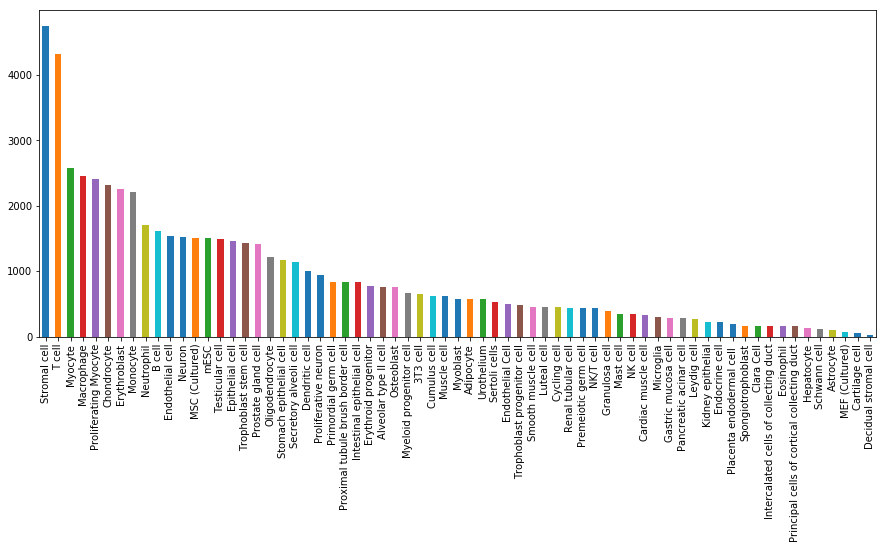

In [66]:
metadata['Cell type'].value_counts().plot(kind='bar')
plt.show()

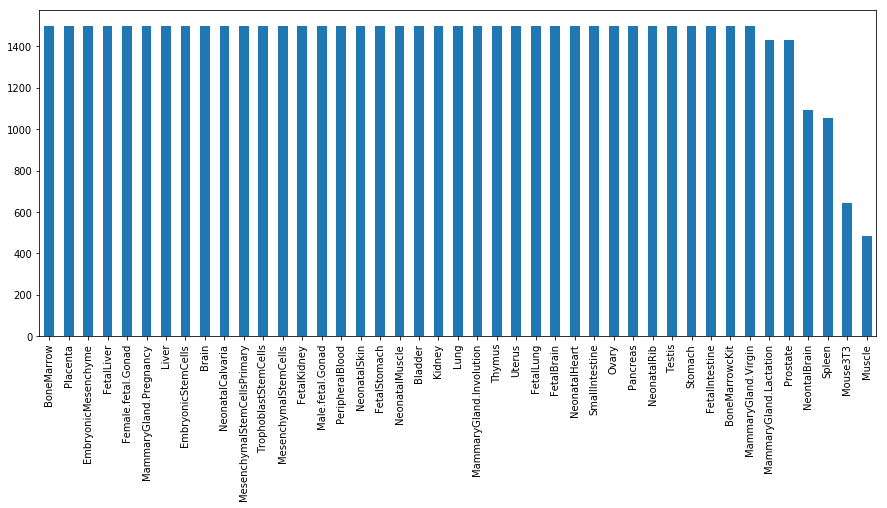

In [12]:
metadata['Tissue'].value_counts().plot(kind='bar')
plt.show()

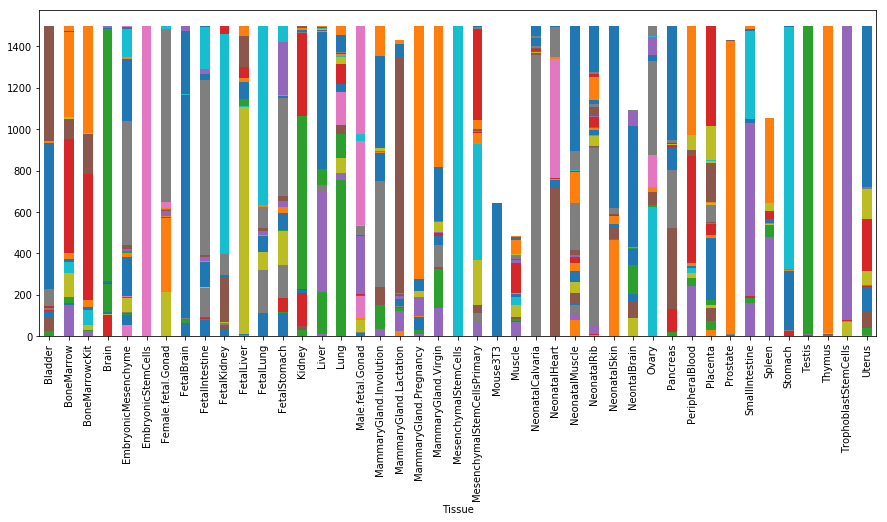

In [13]:
metadata.groupby(['Tissue','Cell type'])['Cell_ID'].size().unstack().plot(kind='bar',stacked=True,legend=None)
plt.show()

In [63]:
brain_samples = metadata.loc[metadata['Tissue'] == 'Brain']

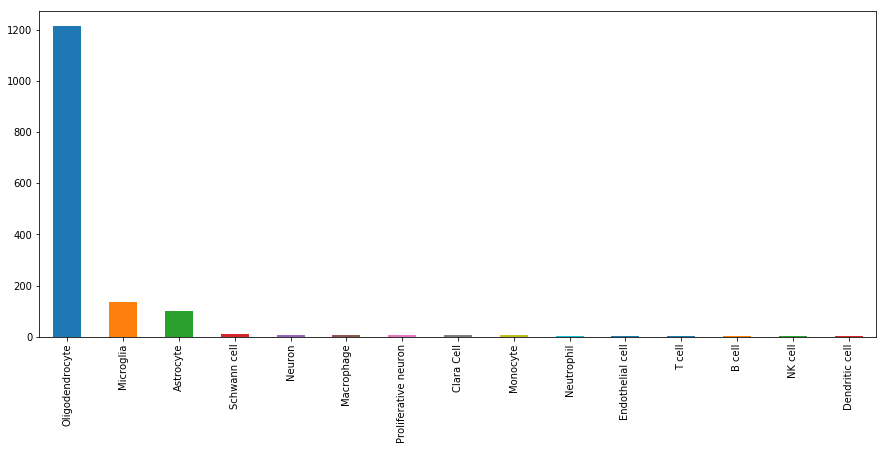

In [67]:
brain_samples['Cell type'].value_counts().plot(kind='bar')
plt.show()

In [16]:
list(brain_samples['Cell_ID'])

['Brain_1.TCTACCTTTAGGGAGATC',
 'Brain_1.TAAGGGATGCTTGAATTA',
 'Brain_1.CCAGACTGTGCGAACGCC',
 'Brain_1.ATTCCACGTGGCCCTTTC',
 'Brain_1.GAATTACTCCATATCTCT',
 'Brain_1.TAGCATGAGGAGGAACGC',
 'Brain_2.ACTTATGTATACCCTTTC',
 'Brain_2.CGAGTAAGTTTATGCAAT',
 'Brain_1.TAGAGAGGGCGAACCTGA',
 'Brain_1.CTCCATAACCTAGTTGCC',
 'Brain_1.AAAACGAAAGTTAAAACG',
 'Brain_1.CATGATGCGTCCCGTGGC',
 'Brain_1.TTCCGCGCTCAACCAGAC',
 'Brain_1.TCTACCATGGCGGCCTAG',
 'Brain_2.AACGCCGTGGTATGAAGC',
 'Brain_2.AGCGAGCACAAGCAAAGT',
 'Brain_1.GCTGTGGTCCCGGTCGGT',
 'Brain_1.CCAGACTGAAGCTCAAAG',
 'Brain_1.AGTTTAACACCCAAAGTT',
 'Brain_1.AGTTTAAACGCCGGCTGC',
 'Brain_1.TAAGGGATCAACATGCTT',
 'Brain_2.GAGGAGTAGCATTAGAGA',
 'Brain_1.TATGTAACGTTGAAAGTT',
 'Brain_1.AATAAAAGGGTCTTAACT',
 'Brain_1.CTGTGTCTGAAACGCACC',
 'Brain_1.TACTTCCGTGGCCTGTGT',
 'Brain_1.TGCGGATTGGACACGTTG',
 'Brain_1.GCGAATAAGTACTTCCGC',
 'Brain_1.CTCGCACGAGTATTCCGC',
 'Brain_1.TTTAGGGAGGAGAGTTTA',
 'Brain_1.GCGAATACACCCCGTGGC',
 'Brain_1.CTCCATTTCATAGCCCTC',
 'Brain_

In [39]:
mca_data_file = '../data/Figure2-batch-removed.txt'

In [68]:
mca_data = pd.read_csv(mca_data_file, usecols=list(brain_samples['Cell_ID']), sep='\t')

In [19]:
mca_data.shape


(25133, 1500)

In [20]:
mca_data.tail()

,Brain_1.TCTACCTTTAGGGAGATC,Brain_1.TAAGGGATGCTTGAATTA,Brain_1.CCAGACTGTGCGAACGCC,Brain_1.ATTCCACGTGGCCCTTTC,Brain_1.GAATTACTCCATATCTCT,Brain_1.TAGCATGAGGAGGAACGC,Brain_2.ACTTATGTATACCCTTTC,Brain_2.CGAGTAAGTTTATGCAAT,Brain_1.TAGAGAGGGCGAACCTGA,Brain_1.CTCCATAACCTAGTTGCC,...,Brain_1.TGAAGCTATGTAGCCTAG,Brain_1.GAACGCTTGGACAAAGTT,Brain_1.GACACTCCATCTCACAAG,Brain_1.GTCCCGCGCTTGTTCCGC,Brain_1.CCGCTAGCGTCCCTCCAT,Brain_1.CTCGCACGTATTCACAAG,Brain_1.CAACAACTGTGTGCTCAA,Brain_1.CTCGCAAACGCCCTTCTG,Brain_1.CATCCCGAACGCCTCGCA,Brain_1.CCGCTAGCCTAGGCCCTC
Zyg11a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zyg11b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zyx,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Zzef1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zzz3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
mca_data['Brain_1.CCAGACTGTGCGAACGCC'].sort_values(ascending=False).head(20)


Ptgds      58
Plp1       34
Fth1       18
Trf        10
mt-Cytb    10
mt-Nd1      6
Cldn11      6
Gpm6b       6
Sept4       5
Mbp         5
Son         4
Syt11       4
Tmem88b     4
Tmsb4x      4
Arpc1a      3
Rpl11       3
Josd2       3
Cox6c       3
Qk          3
Tsc22d4     3
Name: Brain_1.CCAGACTGTGCGAACGCC, dtype: int64

In [22]:
mca_data.loc['Ptgds']

Brain_1.TCTACCTTTAGGGAGATC      0
Brain_1.TAAGGGATGCTTGAATTA      0
Brain_1.CCAGACTGTGCGAACGCC     58
Brain_1.ATTCCACGTGGCCCTTTC      0
Brain_1.GAATTACTCCATATCTCT      0
Brain_1.TAGCATGAGGAGGAACGC      0
Brain_2.ACTTATGTATACCCTTTC      0
Brain_2.CGAGTAAGTTTATGCAAT      0
Brain_1.TAGAGAGGGCGAACCTGA      0
Brain_1.CTCCATAACCTAGTTGCC      0
Brain_1.AAAACGAAAGTTAAAACG      3
Brain_1.CATGATGCGTCCCGTGGC      1
Brain_1.TTCCGCGCTCAACCAGAC     28
Brain_1.TCTACCATGGCGGCCTAG      0
Brain_2.AACGCCGTGGTATGAAGC      9
Brain_2.AGCGAGCACAAGCAAAGT     60
Brain_1.GCTGTGGTCCCGGTCGGT      0
Brain_1.CCAGACTGAAGCTCAAAG     43
Brain_1.AGTTTAACACCCAAAGTT      0
Brain_1.AGTTTAAACGCCGGCTGC     16
Brain_1.TAAGGGATCAACATGCTT      3
Brain_2.GAGGAGTAGCATTAGAGA      0
Brain_1.TATGTAACGTTGAAAGTT      0
Brain_1.AATAAAAGGGTCTTAACT    127
Brain_1.CTGTGTCTGAAACGCACC      0
Brain_1.TACTTCCGTGGCCTGTGT      0
Brain_1.TGCGGATTGGACACGTTG      0
Brain_1.GCGAATAAGTACTTCCGC      5
Brain_1.CTCGCACGAGTATTCCGC    114
Brain_1.TTTAGG

In [23]:
mca_data.loc['Ptgds'].index


Index(['Brain_1.TCTACCTTTAGGGAGATC', 'Brain_1.TAAGGGATGCTTGAATTA',
       'Brain_1.CCAGACTGTGCGAACGCC', 'Brain_1.ATTCCACGTGGCCCTTTC',
       'Brain_1.GAATTACTCCATATCTCT', 'Brain_1.TAGCATGAGGAGGAACGC',
       'Brain_2.ACTTATGTATACCCTTTC', 'Brain_2.CGAGTAAGTTTATGCAAT',
       'Brain_1.TAGAGAGGGCGAACCTGA', 'Brain_1.CTCCATAACCTAGTTGCC',
       ...
       'Brain_1.TGAAGCTATGTAGCCTAG', 'Brain_1.GAACGCTTGGACAAAGTT',
       'Brain_1.GACACTCCATCTCACAAG', 'Brain_1.GTCCCGCGCTTGTTCCGC',
       'Brain_1.CCGCTAGCGTCCCTCCAT', 'Brain_1.CTCGCACGTATTCACAAG',
       'Brain_1.CAACAACTGTGTGCTCAA', 'Brain_1.CTCGCAAACGCCCTTCTG',
       'Brain_1.CATCCCGAACGCCTCGCA', 'Brain_1.CCGCTAGCCTAGGCCCTC'],
      dtype='object', length=1500)

In [30]:
metadata = metadata.set_index('Cell_ID', drop=False) 


In [32]:
metadata.index

Index(['Uterus_1.CTGTGTAAGTACAGGGTC', 'Uterus_2.GTAATGCCAGACCCGACG',
       'Uterus_1.AGGGTCAAGCGGAACGCC', 'Uterus_1.ATTCCACGAGTAATACAG',
       'Uterus_1.ACACCCTTTAGGTAGCAT', 'Uterus_1.CCTTTCACTTATGTCCCG',
       'Uterus_1.GCTCAAAAAGTTAAAACG', 'Uterus_1.TCGTAAATCAACCCAGAC',
       'Uterus_1.GAACGCCATGATTGCGGA', 'Uterus_2.AACCTACGTGGCTCTACC',
       ...
       'Bladder_1.GAGATCAAGCGGTTTAGG', 'Bladder_1.AACCTAGTGGTACATGAT',
       'Bladder_1.CGTATTATACAGAACCTA', 'Bladder_1.AAGTACTAGTCGATGCTT',
       'Bladder_1.GTCGGTAACGCCTGATCA', 'Bladder_1.ATGGCGAAAGTTTGTCAC',
       'Bladder_1.ATCTCTTTCATAGATCTT', 'Bladder_1.CGCACCAAAACGCAAAGT',
       'Bladder_1.GAGGAGCGCTTGATACAG', 'Bladder_1.AGTTTATTTAGGGAGGAG'],
      dtype='object', name='Cell_ID', length=61637)

In [33]:
def boxplot(gene_name):
    metadata.merge(mca_data.loc[gene_name].to_frame(), left_on='Cell_ID', right_index=True).boxplot(column=gene_name, by='Cell type')
    plt.show()

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


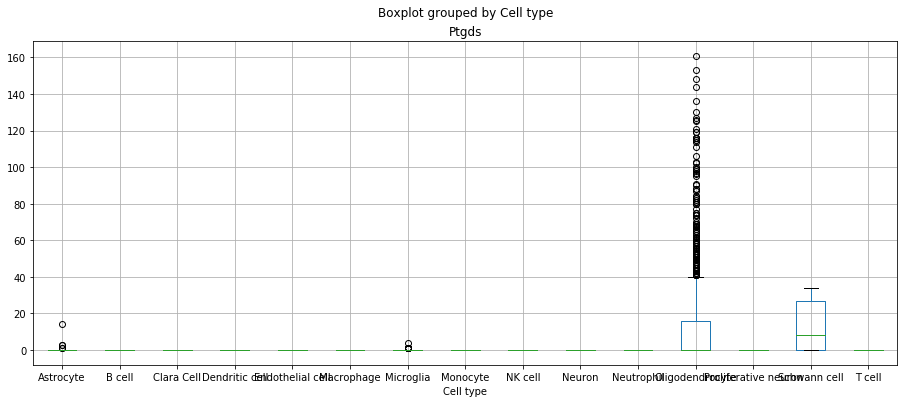

In [35]:
boxplot('Ptgds')

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


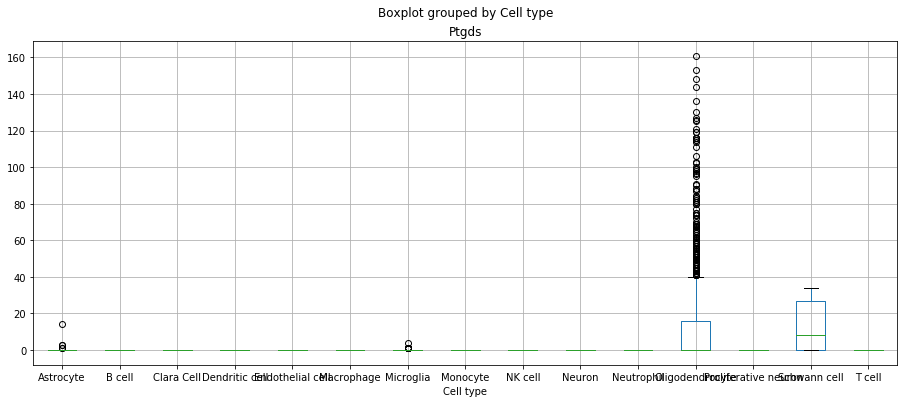

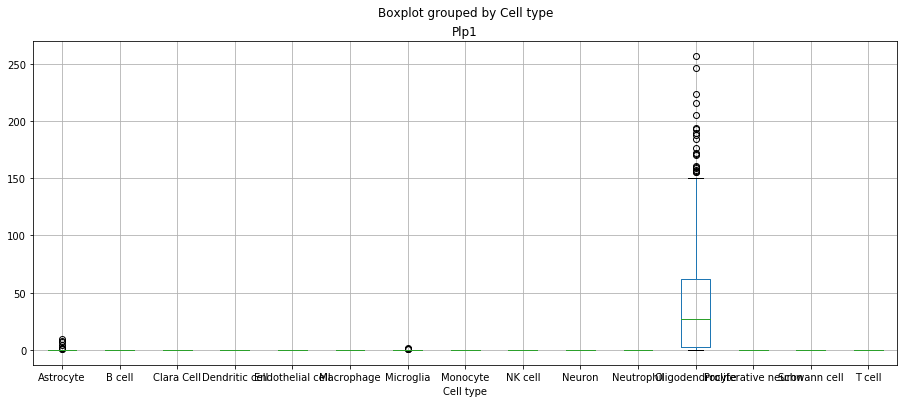

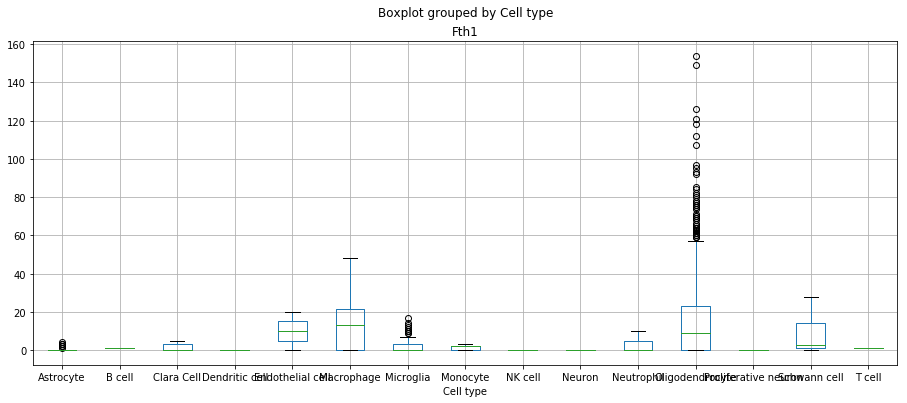

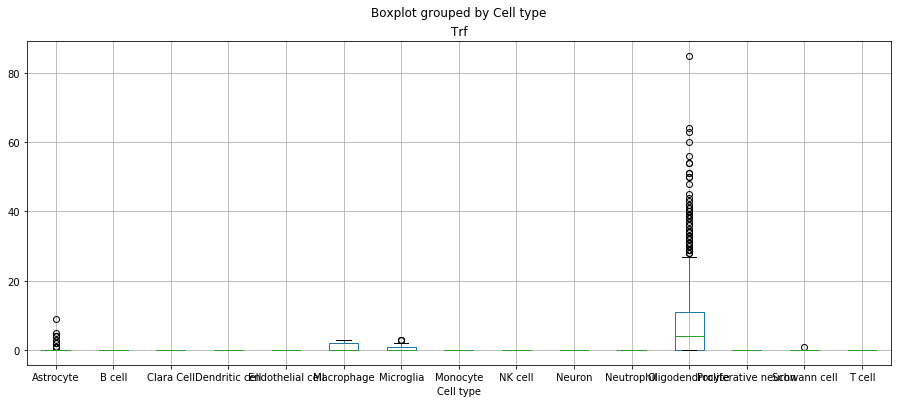

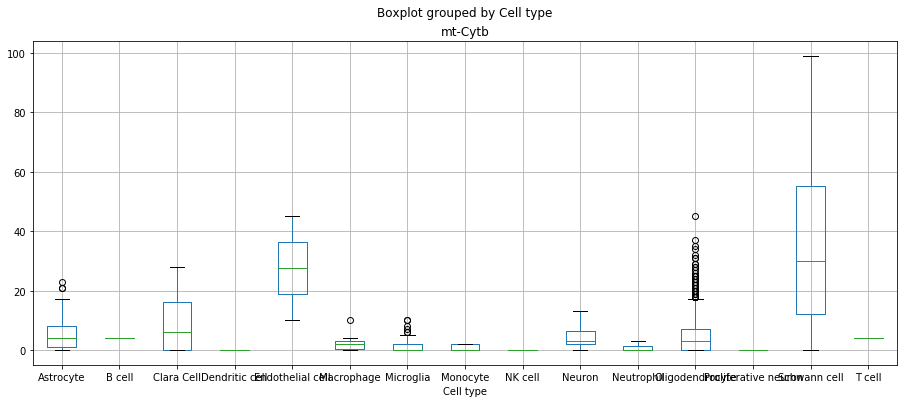

In [36]:
for gene in mca_data['Brain_1.CCAGACTGTGCGAACGCC'].sort_values(ascending=False).head().index:
    boxplot(gene)
    

In [7]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=100)
pca_result = pca.fit_transform(mca_data.transpose())

In [36]:
len(pca.components_[0])

25133

In [51]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36705806 0.15517578 0.08029031 0.05405876 0.03841643 0.02151001
 0.01902391 0.01198698 0.00989394 0.00758868 0.00640877 0.0046817
 0.00375652 0.00359541 0.00355524 0.00344172 0.00294859 0.00278923
 0.00248031 0.00228695 0.00188291 0.00168804 0.0016754  0.00155047
 0.00143483 0.00139593 0.00133904 0.00131963 0.00124794 0.00119861
 0.00118012 0.00113365 0.00109886 0.0010488  0.00102084 0.00101208
 0.00097996 0.00096206 0.00094565 0.00092764 0.00089976 0.00087459
 0.0008417  0.00080764 0.0007951  0.00079181 0.0007692  0.00075734
 0.00074124 0.00073754 0.00072122 0.00070995 0.00070597 0.00068733
 0.00068562 0.00066206 0.00065701 0.00064962 0.00063488 0.00062238
 0.00061733 0.00061362 0.00060768 0.00059383 0.00058674 0.00057698
 0.00056936 0.00055541 0.00055526 0.00055034 0.00054283 0.00053829
 0.00053274 0.00052593 0.00052384 0.00052297 0.00051869 0.00050909
 0.00050178 0.00049485 0.0004906  0.00048385 0.00048238 0.00047825
 0.00047058 0.0004

In [10]:
pca_result[1:10][1:10]

array([[-2.03718488e+00, -4.05177909e-01,  6.51679718e-02,
        -5.61836233e-01, -5.09112595e-01,  5.68000482e-01,
         3.80861511e-01,  1.42126701e-01,  6.86273155e-02,
         7.75090235e-02,  2.82838929e-03,  1.34731435e-01,
         9.82308142e-02,  3.45709383e-04, -3.87960424e-02,
         1.42908674e-02,  1.54140958e-02, -1.13662979e-02,
         8.75904463e-03, -2.63418055e-02,  3.97000452e-02,
         2.33771390e-02,  3.98044564e-02,  3.54521714e-02,
        -8.56644153e-03,  3.61124825e-03, -6.64648946e-04,
        -7.02144191e-03, -1.51443235e-02, -6.37843502e-02,
        -1.10421995e-02, -5.18284347e-03,  1.99370365e-02,
        -6.45688161e-04, -3.29613881e-02, -8.19319810e-03,
         1.04204038e-02, -1.36477087e-02,  4.02496639e-03,
        -8.32693138e-03,  8.63324504e-03,  2.68438679e-03,
         7.30690046e-03,  3.88161806e-03, -7.44931140e-03,
         4.19668910e-03, -1.40242912e-02, -9.45325579e-03,
         1.15868788e-02,  1.61334418e-02],
       [ 4.27

In [38]:
pca_df = pd.DataFrame(pca_result[:,0:2], columns=['first','second'])

In [39]:
pca_df.shape

(1500, 2)

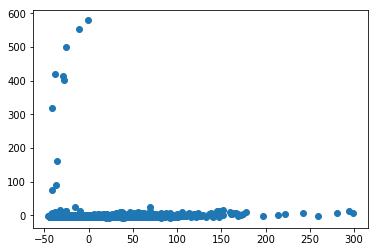

In [52]:
plt.scatter(pca_result[:,0],pca_result[:,1])

In [42]:
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding

In [14]:
from ggplot import *


chart = ggplot( pca_result, aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

ModuleNotFoundError: No module named 'ggplot'

In [53]:
import hdbscan
from   sklearn.preprocessing import StandardScaler

clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
X_std = StandardScaler().fit_transform(pca_result)
cluster_labels = clusterer.fit_predict(X_std) + 1
print('Number of clusters: {}'.format(max(cluster_labels)))


Number of clusters: 0


In [ ]:
do_plot(tsne3.fit_transform(X), 'HDBScan', labels=cluster_labels)

In [66]:
tsne2 = TSNE(n_components=2, random_state=0, perplexity=50, early_exaggeration=50, verbose=2)
tsne_res = tsne2.fit_transform(mca_data.transpose())

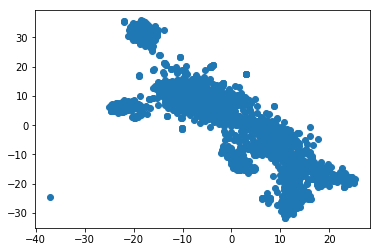

In [67]:
plt.scatter(tsne_res[:,0],tsne_res[:,1])

In [63]:
plt_style = 'seaborn-talk'
def do_plot(X_fit, title=None, labels=None):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=[col])
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=[col])
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

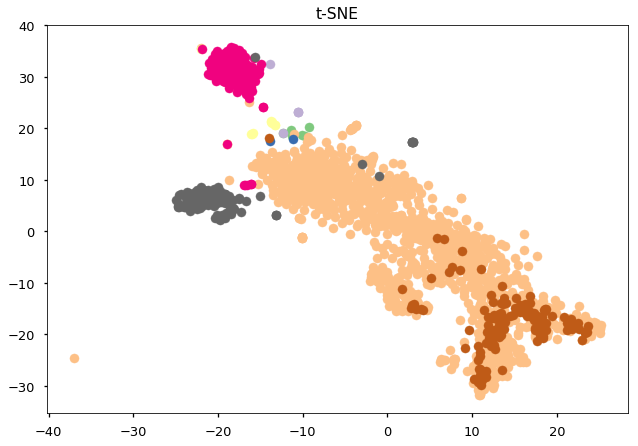

In [68]:
do_plot(tsne_res,'t-SNE',metadata[metadata['Tissue'] == 'Brain']['ClusterID'])

In [59]:
tsne_res.shape

(1500, 2)

In [38]:
mca_data.head()

,Brain_1.TCTACCTTTAGGGAGATC,Brain_1.TAAGGGATGCTTGAATTA,Brain_1.CCAGACTGTGCGAACGCC,Brain_1.ATTCCACGTGGCCCTTTC,Brain_1.GAATTACTCCATATCTCT,Brain_1.TAGCATGAGGAGGAACGC,Brain_2.ACTTATGTATACCCTTTC,Brain_2.CGAGTAAGTTTATGCAAT,Brain_1.TAGAGAGGGCGAACCTGA,Brain_1.CTCCATAACCTAGTTGCC,...,Brain_1.TGAAGCTATGTAGCCTAG,Brain_1.GAACGCTTGGACAAAGTT,Brain_1.GACACTCCATCTCACAAG,Brain_1.GTCCCGCGCTTGTTCCGC,Brain_1.CCGCTAGCGTCCCTCCAT,Brain_1.CTCGCACGTATTCACAAG,Brain_1.CAACAACTGTGTGCTCAA,Brain_1.CTCGCAAACGCCCTTCTG,Brain_1.CATCCCGAACGCCTCGCA,Brain_1.CCGCTAGCCTAGGCCCTC
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610006L08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
0610009B22Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [39]:
mca_data.shape

(25133, 1500)

In [ ]:
# "http://bis.zju.edu.cn/MCA/data/tissues/{tissue}/tsne_{tissue}.csv".format(tissue='Brain')
# "http://bis.zju.edu.cn/MCA/data/tissues/{tissue}/mca_top_markers_{tissue}.json".format(tissue='Brain')


In [69]:
tsne_Brain = pd.read_csv('../data/tsne_Brain.csv')

In [70]:
tsne_Brain.head()

,tsne1,tsne2,label,anno
0,58.516113,73.333178,12,Schwann cell(Brain)
1,57.916962,73.263551,12,Schwann cell(Brain)
2,57.518348,73.535935,12,Schwann cell(Brain)
3,57.284305,73.428998,12,Schwann cell(Brain)
4,56.672104,73.222097,12,Schwann cell(Brain)


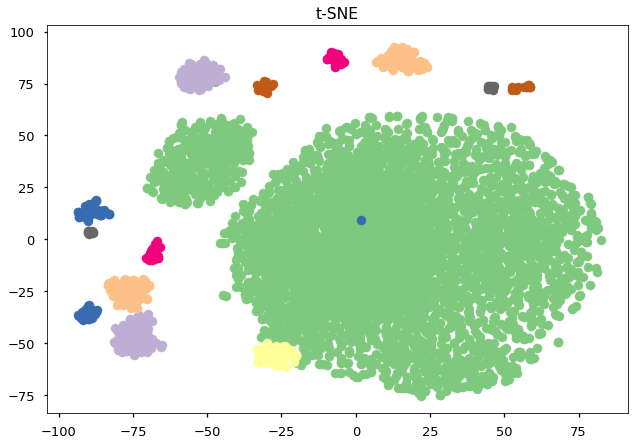

In [78]:
do_plot(tsne_Brain[['tsne1','tsne2']].values,'t-SNE',tsne_Brain["label"])

In [80]:
tsne_Brain.shape

(4038, 4)